In [2]:
#Loading the Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# First few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
#Basic Overview of Data

#Shape and Columns
print(df.shape)
print(df.columns)
#Info and Summary
print(df.info())
print(df.describe())
#Check for missing values
print(df.isnull().sum())

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count 

In [4]:
#Data Cleaning 
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin safely
df.drop('Cabin', axis=1, errors='ignore', inplace=True)

# Confirm all missing values handled
print(df.isnull().sum())



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\anime\AppData\Local\Temp\ipykernel_14852\265103860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\anime\AppData\Local\Temp\ipykernel_14852\265103860.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

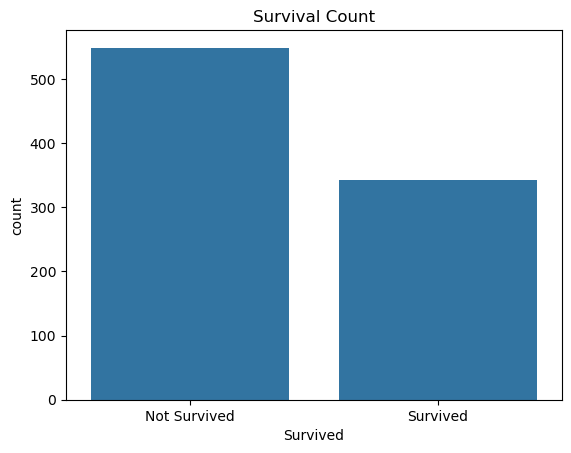

In [5]:
#Univariate Analysis
# 1. Survived (Target Variable)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived',data=df)
plt.title('Survival Count')
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

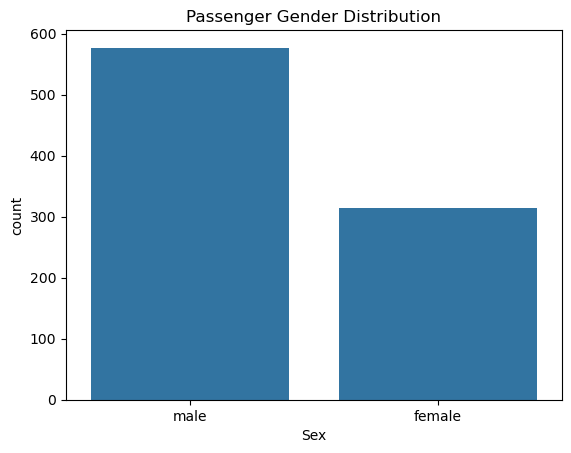

In [6]:
#2. Gender Distribution
sns.countplot(x='Sex',data=df)
plt.title('Passenger Gender Distribution')
plt.show()

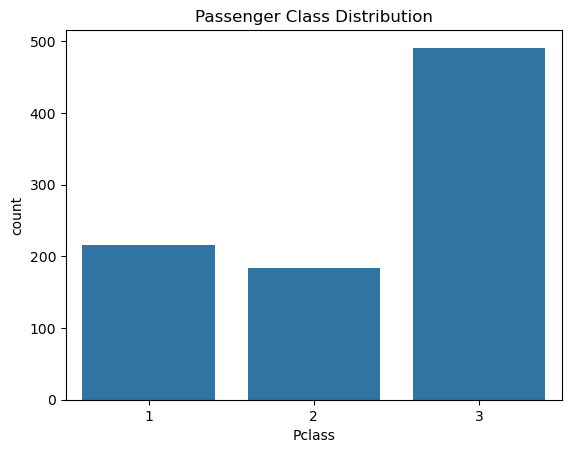

In [8]:
#3. PClass (Ticket Class)
sns.countplot(x='Pclass',data=df)
plt.title('Passenger Class Distribution')
plt.show()

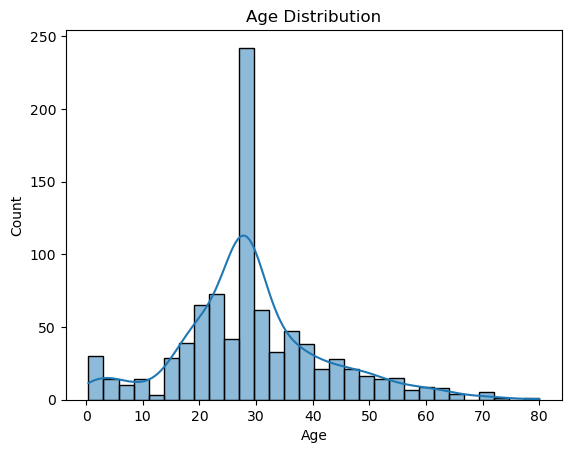

In [ ]:
#4. Age(Continuous Variable)
sns.histplot(df['Age'],kde=True,bins=30)
plt.title('Age Distribution')
plt.show()

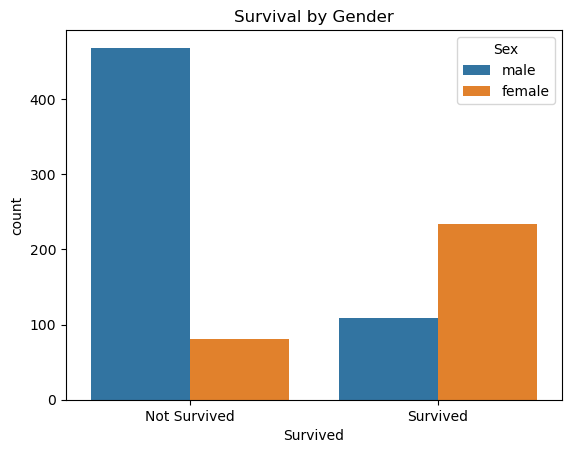

In [14]:
#Bivariate Analysis 

#1. Survival Rate by Gender 
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Survival by Gender')
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

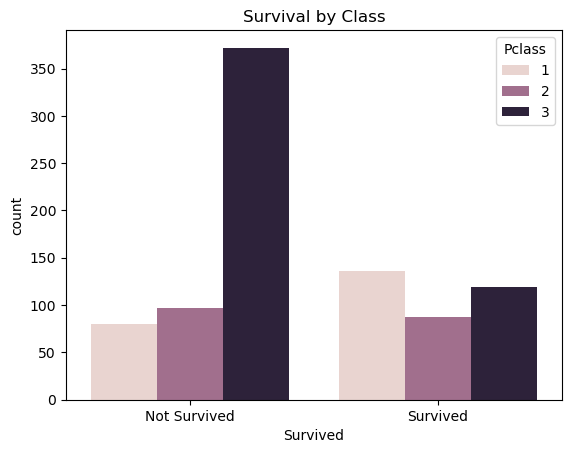

In [17]:
#2. Survival Rate by Class

sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title('Survival by Class')
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

C:\Users\anime\AppData\Local\Temp\ipykernel_14852\1821151410.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived']==1]['Age'], label='Survived', shade=True)
C:\Users\anime\AppData\Local\Temp\ipykernel_14852\1821151410.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived']==0]['Age'], label='Not Survived', shade=True)


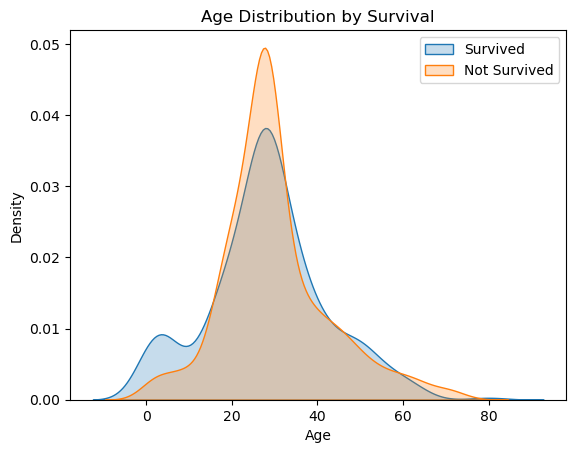

In [18]:
#3. Age vs Survival (using KDE plot)
sns.kdeplot(data=df[df['Survived']==1]['Age'], label='Survived', shade=True)
sns.kdeplot(data=df[df['Survived']==0]['Age'], label='Not Survived', shade=True)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()



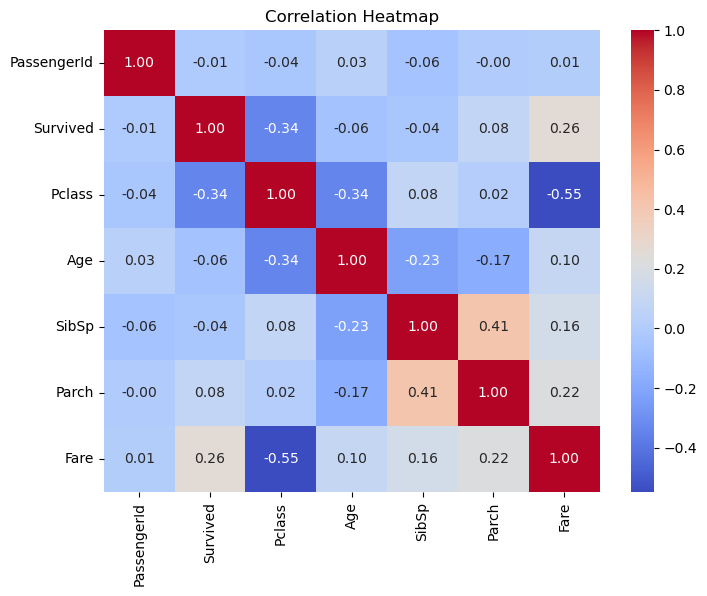

In [19]:
#6 Correlation & Heatmap (for numerical variables)
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
correlation = numerical_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
P